In [1]:
import tifffile, numpy
from skimage import data
from skimage import filters
from skimage import exposure

import segmentation_tools

a = tifffile.memmap( '/mnt/sonic/fred/dec2019/synmarker/200nmXY_600nmZ_msGephyrin488_bassoon647_rbHomercy3_sameFOV_chrCorrect.tif' )
b = numpy.array( a[:,0,:,:].astype(numpy.int32) )

In [2]:
a.shape

(39, 3, 2100, 2100)

In [3]:
otsu_val = filters.threshold_otsu( b )
#otsu_val = 24000
otsu_val = 9500
segmentation_tools.threshold_image( b, otsu_val )

In [4]:
otsu_val

9500

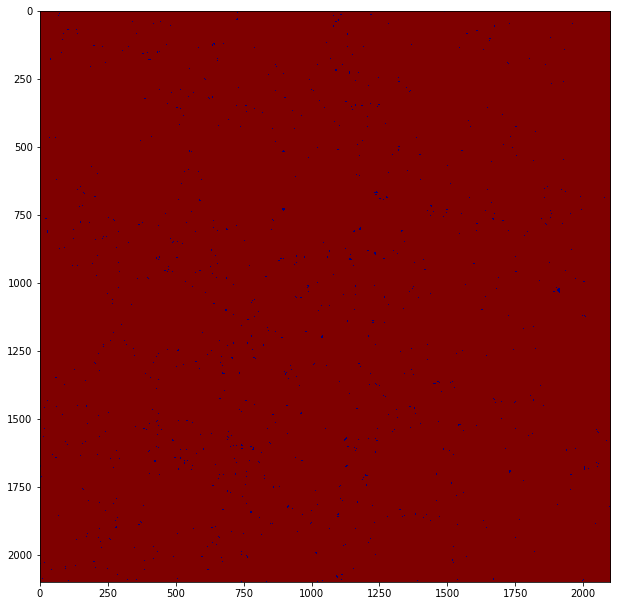

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

imgplot = plt.imshow(b[20], cmap="jet")
plt.show()

In [6]:
counts = segmentation_tools.flood_fill(b)

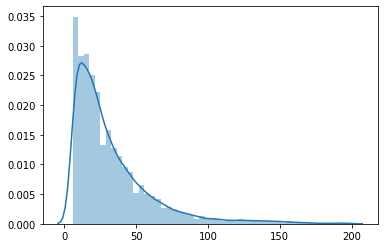

In [7]:
import seaborn

seaborn.distplot( list( x for x in counts.values() if x>5 and x<200 ) )

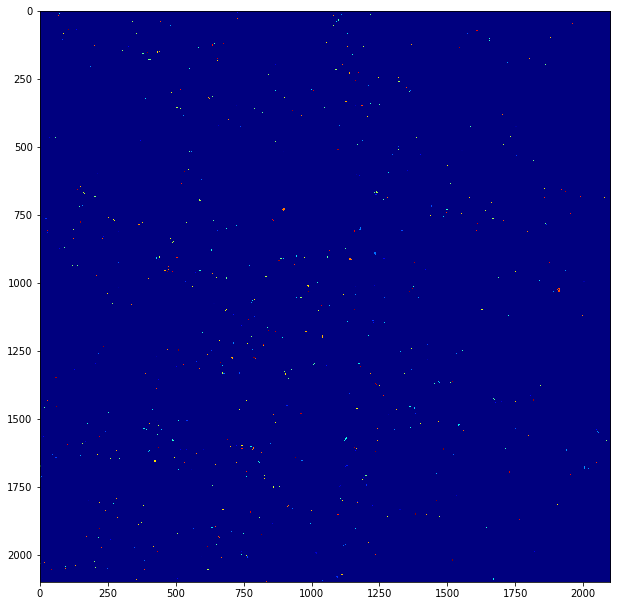

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

imgplot = plt.imshow(b[20], cmap="jet")
plt.show()

In [9]:
new_counts = segmentation_tools.flood_threshold( b, counts, 400, 13 )

In [10]:
len( new_counts ), len( counts ) 

(7943, 27089)

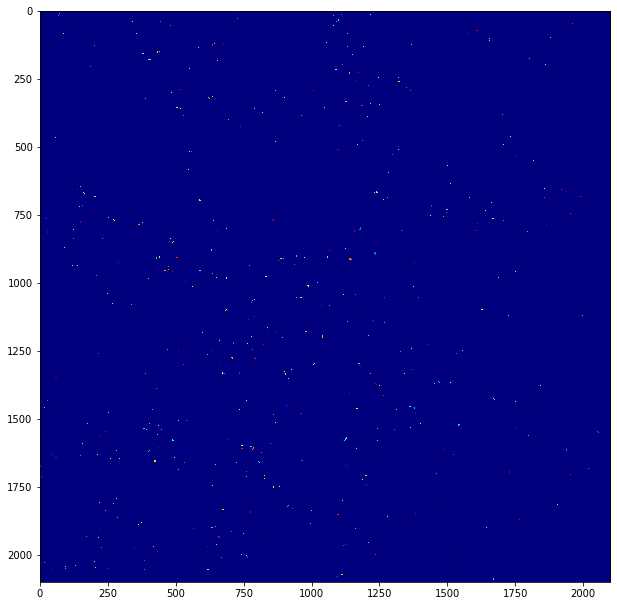

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

imgplot = plt.imshow(b[20], cmap="jet")
plt.show()

In [12]:
new_counts_centroid = segmentation_tools.find_centroids( b, new_counts )

In [7]:
tifffile.imwrite( 'temp.tif', b.astype(numpy.uint16) )

In [14]:
b[0,0,0]

0